# Lab 2 – Deep Learning - Handwritten digits classification using Neural Networks

Welcome to Lab 2 on using deep neural networksfor the classification of handwritten digits. In the prevoius
**Lab 1** - **Linear** and **Polynomial** **regression** with TensorFlow and Keras we built simple one layer models for linear
and polynomial regression.


In this Lab, we are going to build **multi-layer networks** starting with asimple **Dense** layers model. 

Than we will
study several convolutional models with different types of layers including: convolutional layers, flattened layers,
pooling layers and dropout layers.
The following topics will be covered in this lab:
*  **MNIST** Dataset
*  Deep multilayer network
*  Convolution
*  Pooling
*  Dropout
*  Training the model and testing the models
*  Comparing the results

**2.1 Code implementation for simple multi-layer network**

In this lab, we will be using the Keras deep learning library, which is a high-level neural network API capable of running on top of TensorFlow.

**2.1.1 Importing all of the dependencies**

We will be using the **numpy** , **matplotlib** , **keras** , **scipy** , and **tensorflow** packages in this exercise.
Here, **TensorFlow** is used as the *backend* for **Keras**.


**Note:**
We will not spend time understanding how Keras works, but if you are interested, refer to this easy-to-
understand official documentation from Keras at **https://keras.io/**
You can install these packages with pip . For the MNIST data, we will be using the dataset available in the
keras module with a simple *import*

In [3]:
!pip install numpy

     |████████████████████████████████| 14.5MB 1.3MB/s eta 0:00:01    |█                               | 460kB 583kB/s eta 0:00:25     |█████▏                          | 2.4MB 1.8MB/s eta 0:00:07


In [1]:
import numpy as np

It is important that you set seed for reproducibility:


In [ ]:
!pip install tensorflow


     |████████████████████████████████| 516.2MB 24kB/s  eta 0:00:01   |▌                               | 8.2MB 1.4MB/s eta 0:05:57     |▉                               | 13.7MB 1.4MB/s eta 0:05:51     |█▉                              | 29.1MB 3.1MB/s eta 0:02:36     |██▏                             | 35.2MB 902kB/s eta 0:08:53     |██▌                             | 40.9MB 1.2MB/s eta 0:06:51     |██▋                             | 42.8MB 1.6MB/s eta 0:04:49     |███▊                            | 59.2MB 2.6MB/s eta 0:02:54     |████▌                           | 72.1MB 1.9MB/s eta 0:04:00     |████▋                           | 73.6MB 1.6MB/s eta 0:04:43     |█████                           | 78.9MB 1.6MB/s eta 0:04:35     |█████                           | 80.8MB 3.9MB/s eta 0:01:53     |██████                          | 95.5MB 2.0MB/s eta 0:03:35     |███████▌                        | 120.5MB 2.9MB/s eta 0:02:15     |███████▋                        | 123.1MB 2.9MB/s eta 0:02:15     |████

     |████████████████████████████████| 788kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 133kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 143kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 163kB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 153kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 2.7MB/s eta 0:00:01
  Stored in directory: /home/bako/snap/jupyter/6/.cache/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Stored in directory: /home/bako/snap/jupyter/6/.cache/pip/wheels/7c/06/54/bc84598ba1d

In [2]:
# set seed for reproducibility
seed_val = 9000
np.random.seed(seed_val)


Importing the dataset for MNIST:


In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)

**2.1.2 Exploring the data**

Now that the data has been imported, let's explore these digits:

In [4]:
!pip install keras

     |████████████████████████████████| 276kB 921kB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 2.4MB/s eta 0:00:01     |███████████████████████████████▋| 2.8MB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 25.9MB 1.9MB/s eta 0:00:01    |▏                               | 163kB 2.1MB/s eta 0:00:13     |█████████▊                      | 7.9MB 1.6MB/s eta 0:00:12     |████████████████▊               | 13.5MB 1.9MB/s eta 0:00:07     |███████████████████▋            | 15.9MB 1.7MB/s eta 0:00:06     |██████████████████████████      | 21.0MB 1.9MB/s eta 0:00:03     |██████████████████████████████▊ | 24.8MB 1.9MB/s eta 0:00:01
  Stored in directory: /home/bako/snap/jupyter/6/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml


In [ ]:
print('Size of the training_set: ', X_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))


From the preceding screenshot, we can see that we have **60000** train images, **10000** test images with each
image being **28*28** in size, and a total of **10** predictable classes.
Now, let's plot **9** handwritten digits. Before that, we will need to import **matplotlib** for plotting:


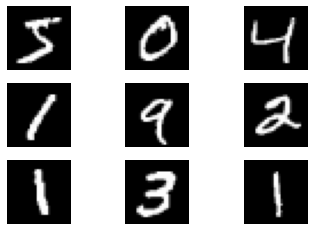

In [ ]:
import matplotlib.pyplot as plt
# Plot of 9 random images
for i in range(0, 9):
  plt.subplot(3,3,1+i) # plot of 3 rows and 3 columns
  plt.axis('off') # turn off axis
  plt.imshow(X_train[i], cmap='gray') # gray scale
plt.show()


**Figure 1.1** Visualizing MNIST digits

**2.1.3 Defining the hyperparameters**

The following are some of the hyperparameters that we will be using throughout our code. These are totally configurable:


In [ ]:
# Number of epochs
epochs = 20
# Batchsize
batch_size = 128
# Optimizer for the generator
from keras.optimizers import Adam
optimizer = Adam(lr=0.01)
# try 0.0001
# Shape of the input image
input_shape = (28,28,1)


If you look back at **Lab 1** , you'll see that the optimizer used there was **Adam** . Therefore, we will import the **Adam**
**optimizer** from the keras module and set its learning rate, as shown in the preceding code. For most cases that
will follow, we will be training for **20 epochs** for ease of comparison.


**2.2 Building and training a simple deep neural network**

Now that we have loaded the data into memory, we need to build a simple neural network model to predict the
MNIST digits.

**2.2.1 Building a model**

We will be building a **Sequential** model. So, let's import it from **Keras** and initialize it with the following code:

In [ ]:
from keras.models import Sequential
model = Sequential()


The next thing that we need to do is define the **Dense/Perceptron** layer. In Keras, this can be done by importing the **Dense** layer, as follows:

In [ ]:
from keras.layers import Dense


Then, we need to add the **Dense** layer to the **Sequential** model as follows:

In [ ]:
model.add(Dense(300, input_shape=(784,), activation = 'relu'))


The **add** command performs the job of appending a layer to the **Sequential** model, in this case, **Dense** .

In the **Dense** layer in the preceding code, we have defined the **number of neurons** in the first hidden layer, which is **300** . We have also defined the **input_shape** parameter as being equal to (**784**,) to indicate to the model that it will be accepting input arrays of the shape **(784,)**.
This means that the input layer will have 784 neurons.

The type of activation function that needs to be applied to the result can be defined with the **activation parameter**. In this case, this is **relu** .

Add another **Dense** layer of 300 neurons by using the following code:

In [ ]:
model.add(Dense(300, activation='relu'))


And the final **Dense** layer with the following code:


In [ ]:
model.add(Dense(10, activation='softmax'))


Here, the **final layer has 10 neurons** as we need it to predict scores for **10 classes**. The activation function that has been chosen here is **softmax** so that we can limit the scores between 0 and 1, and the sum of
scores to 1.

Compiling the model in **Keras** is super-easy and can be done with following code:


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer ,
metrics = ['accuracy'])


The **metrics** that need to be monitored during this learning process must be specified as a list to the **metrics parameter** of the **compile** method.

Print out the **summary** of the model with the following code:


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Notice that this model has **328,810 trainable parameters**, which is reasonable.

Now, split the **train** data into train and **validation** data by using the **train_test_split** function that we imported from **sklearn** :


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify =
y_train, test_size = 0.08333, random_state=42)
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])


Training Examples 55000
Validation Examples 5000
Test Examples 10000


We have split the data so that we end up with 55,000 training examples and 5,00 validation examples.

You will also see that we have reshaped the arrays so that each image is of **shape(784,)**. This is because we have defined the model to accept images/arrays of **shape(784,)** .
We will now train our model on 55,000 **training** examples, **validate** on 5,000 examples, and **test** on 10,000 examples.

Assigning the **fit** to a variable stores relevant information inside it, such as **train** and **validation loss** and
**accuracy** at each epoch , which can then be used for plotting the learning process.


**2.2.2 Fitting a model**

To fit a model in **Keras**, along with train digits and train labels, call the fit method of the model with the
following parameters:

*  epochs : The number of epochs
*  batch_size : The number of images in each batch
*  validation_data : The tuple of validation images and validation labels

Look at the Defining the **hyperparameters** section of the lab for the defined values of **epochs** and **batch_size** :

In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size,
validation_data=(X_val, y_val))


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 72us/step - loss: 0.5891 - accuracy: 0.8105 - val_loss: 0.8869 - val_accuracy: 0.7902
Epoch 2/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.5751 - accuracy: 0.8156 - val_loss: 0.7871 - val_accuracy: 0.8030
Epoch 3/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.6018 - accuracy: 0.8047 - val_loss: 0.9281 - val_accuracy: 0.7874
Epoch 4/20
55000/55000 [==============================] - 4s 72us/step - loss: 0.6115 - accuracy: 0.8011 - val_loss: 0.7926 - val_accuracy: 0.8054
Epoch 5/20
55000/55000 [==============================] - 4s 72us/step - loss: 0.6341 - accuracy: 0.8007 - val_loss: 0.9750 - val_accuracy: 0.7942
Epoch 6/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.5847 - accuracy: 0.8107 - val_loss: 0.7430 - val_accuracy: 0.8104
Epoch 7/20
55000/55000 [==============================] - 4s 75us/ste

**2.2.3 Evaluating a model**

To evaluate the model on test data, you can call the evaluate method of the model by feeding the **test images** and **test label**s:

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)


10000/10000 [==============================] - 0s 38us/step
Test loss: 0.6456351698875428
Accuracy: 0.8184000253677368


Now, let's define a function to **plot** the **train** and **validation loss** and **accuracy** that we have stored in the
**history** variable:


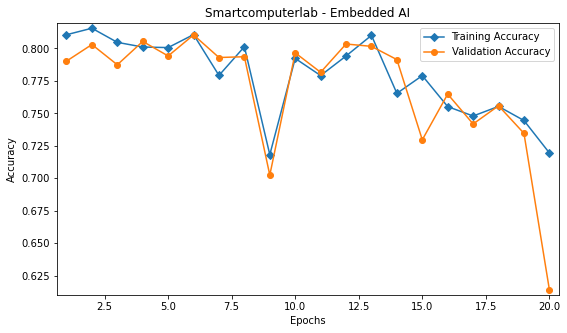

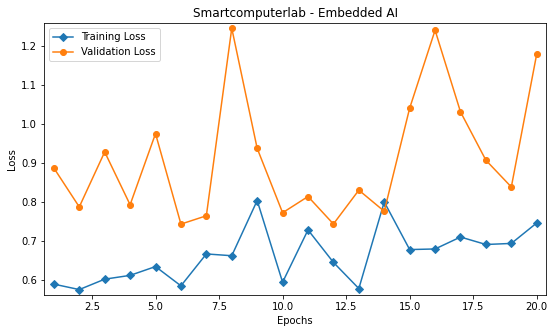

In [ ]:
import matplotlib.pyplot as plt
def loss_plot(history):
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_acc,marker='D',label='Training Accuracy')
  plt.plot(np.arange(1,len(train_acc)+1),val_acc,marker='o',label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_loss,marker='D',label='Training Loss')
  plt.plot(np.arange(1,len(train_acc)+1),val_loss,marker='o',label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()

# plot training loss
loss_plot(history)


**2.2.4 Complete implementation - *build*, *compile*, *train* and *evaluate***

This complete module implements training and evaluation of a simple (**Dense**) multi-layer model:


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 74us/step - loss: 7.0647 - accuracy: 0.7925 - val_loss: 2.3641 - val_accuracy: 0.8822
Epoch 2/20
55000/55000 [==============================] - 4s 70us/step - loss: 1.5513 - accuracy: 0.9137 - val_loss: 1.5395 - val_accuracy: 0.9124
Epoch 3/20
55000/55000 [==============================] - 4s 70us/step - loss: 0.8768 - accuracy: 0.9405 - val_loss: 1.2237 - val_accuracy: 0.9254
Epoch 4/20
55000/55000 [==============================] - 4s 69us/step - loss: 0.5460 - accuracy: 0.9543 - val_loss: 1.0965 - val_accuracy: 0.9326
Epoch 5/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.3516 - accuracy: 0.9663 - val_loss: 1.0127 - val_accuracy: 0.9308
Epoch 6/20
55000/55000 [==============================] - 4s 72us/step - loss: 0.2220 - accuracy: 0.9741 - val_loss: 0.9654 - val_accuracy: 0.9330
Epoch 7/20
55000/55000 [==============================] - 4s 70us/ste

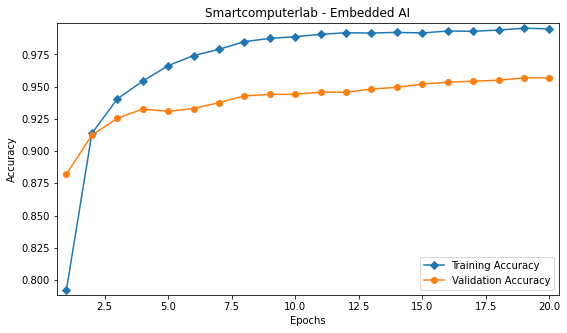

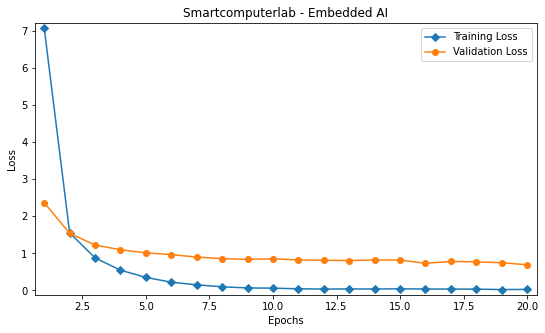

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def loss_plot(history):
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_acc,marker='D',label='Training Accuracy')
  plt.plot(np.arange(1,len(train_acc)+1),val_acc,marker='o',label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_loss,marker='D',label='Training Loss')
  plt.plot(np.arange(1,len(train_acc)+1),val_loss,marker='o',label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()

# Number of Convolution – Python fileepochs
epochs = 20
# Batchsize
batch_size = 128
# Optimizer for the generator
from keras.optimizers import Adam
optimizer = Adam(lr=0.0001) # in the receding example lr=0.01 !
# Shape of the input image
input_shape = (28,28,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
stratify = y_train,
test_size = 0.08333,
random_state=42)
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation = 'relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size,
validation_data=(X_val, y_val))

loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)
loss_plot(history)




**Figure 3a** **Accuracy** for **MLP** model and
**lr=0.0001** learning rate

**Figure 3b** **Loss** for **MLP** model
and **lr=0.0001** learning rate

**2.3 Convolution**

**Convolution** can be defined as the process of **striding** a small **kernel/filter/array** over a target array and
obtaining the **sum of element-wise multiplication** between the **kernel** and a subset of equal size of the target
array at that location.

Consider the following example:

**array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])**

**kernel = np.array([-1, 1, 0])**

Here, you have a **target array of length 10** and a **kernel of length 3**.

When you start the convolution, implement the following steps:

*  1. The kernel will be multiplied with the subset of the target array within indices 0 through 2. This will
be between [-1,1,0] (kernel) and [0,1,0] (from index 0 through to 2 of the target array). 
The result of this element-wise multiplication will then be summed up to obtain what is called the result of **convolution**.
*  2. The kernel will then be **stridden by 1 unit** and then multiplied with the subset of the target array within
the indices 1 through 3, just like in Step 1, and the result is obtained.
*  3. Step 2 is repeated until a subset equal to the length of the kernel is not possible at a new stride location.

The result of convolution at each stride is stored in an array . This array that's holding **the result of the convolution** is called the **feature map**.

The length of the **1-D feature map** (with step/stride of 1) is equal to the
difference in length of the kernel and the target array plus 1.

Only in this case, we need to take the following equation into account:

>  **length of the feature map = length of the target array - length of the kernel + 1**

Here is a code snippet implementing 1-D convolution:



In [ ]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
kernel = np.array([-1, 1, 0])
# empty feature map
conv_result = np.zeros(array.shape[0] - kernel.shape[0] +1).astype(int)
for i in range(array.shape[0] - kernel.shape[0] +1):
  # convolving
  conv_result[i] = (kernel * array[i:i+3]).sum()
  print(kernel, '*', array[i:i+3], '=', conv_result[i])
  
print('Feature Map :', conv_result)


[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
[-1  1  0] * [0 1 0] = 1
[-1  1  0] * [1 0 1] = -1
Feature Map : [ 1 -1  1 -1  1 -1  1 -1]


**2.3.1 Convolution in Keras**

Now that you have an understanding of how convolution works, let's put it into use and build a **CNN** classifier on **MNIST** digits.
For this, import the **Conv2D** API from the layers module of **Keras**. You can do this with the following code:


In [ ]:
from keras.layers import Conv2D


Since the convolution will be defined to accept images of shape 28 * 28 * 1 , we need to reshape all the images
to be of 28 * 28 * 1 :


In [ ]:
import numpy as np
from keras.datasets import mnist
# Shape of the input image
input_shape = (28,28,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
stratify = y_train,
test_size = 0.08333,
random_state=42)
# reshape data
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)


Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


To build the model , just like we did previously, we need to initialize the model as **Sequential** :


In [ ]:
model = Sequential()


Now, add the **Conv2D** layer to the model with the following code:


In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation= 'relu'))


In the **Conv2D** API, we have defined the following parameters:

*  units: 32 (number of kernels/filters)
*  kernel_size : (3,3) (size of each kernel)
*  input_shape : 28 * 28 * 1 (shape of the input array it will receive)
*  activation **relu**

The result of the preceding convolution is **32 feature maps** of size 26*26. These **2-D** feature maps now have to be converted into a **1-D** feature map. This can be done in Keras with the following code:


In [ ]:
from keras.layers import Flatten
model.add(Flatten())


The result of the preceding snippet is just like a layer of neurons in a simple neural network. The **Flatten**
function converts all of the **2-D** feature maps into a single **Dense** layer. In this layer, will we add a Dense layer with 128 neurons:


In [ ]:
model.add(Dense(128, activation = 'relu'))


Since we need to get scores for each of the **10 possible classes**, we must add another **Dense** layer with **10 neurons**, with **softmax** as the activation function:


In [ ]:
model.add(Dense(10, activation = 'softmax'))


Now, just like in the case of the simple dense neural network we built in the preceding code, we will **compile**
and **fit** the model:


In [ ]:
# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
metrics = ['accuracy'])
# print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


From the model's summary, we can see that this **convolution classifier** has **2,770,634** parameters. This is a lot
of parameters compared to the Perceptron (MLP) model. Let's **fit** this model and evaluate its performance.


**2.3.3.2 Fitting the model**

We fit the convolution neural network model on the data with the following code:

In [ ]:
# fit model
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size,
validation_data=(X_val, y_val))


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 45s 827us/step - loss: 1.1177 - accuracy: 0.8498 - val_loss: 0.2652 - val_accuracy: 0.9312
Epoch 2/20
55000/55000 [==============================] - 45s 817us/step - loss: 0.1748 - accuracy: 0.9524 - val_loss: 0.1956 - val_accuracy: 0.9480
Epoch 3/20
55000/55000 [==============================] - 45s 822us/step - loss: 0.0941 - accuracy: 0.9730 - val_loss: 0.1465 - val_accuracy: 0.9650
Epoch 4/20
55000/55000 [==============================] - 45s 823us/step - loss: 0.0573 - accuracy: 0.9835 - val_loss: 0.1303 - val_accuracy: 0.9672
Epoch 5/20
55000/55000 [==============================] - 45s 825us/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.1252 - val_accuracy: 0.9722
Epoch 6/20
55000/55000 [==============================] - 45s 826us/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.1216 - val_accuracy: 0.9710
Epoch 7/20
55000/55000 [==============================] -

We can see that the convolution classifier's accuracy is 97.48% on the validation data.

**2.3.3.3 Evaluating the model**

You can evaluate the convolution model on the test data with the following code:

In [ ]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)


10000/10000 [==============================] - 3s 287us/step
Test loss: 0.1562033438282594
Accuracy: 0.9750999808311462


We can see that the model is 97.50% accurate on test data, 97.48% on validation data, and 99.89% on train
data. It is clear from the loss as well that the model is slightly **overfitting** on the train data. We will talk about
how to handle overfitting later.
Now, let's plot the train and validation metrics to see how the training has progressed:


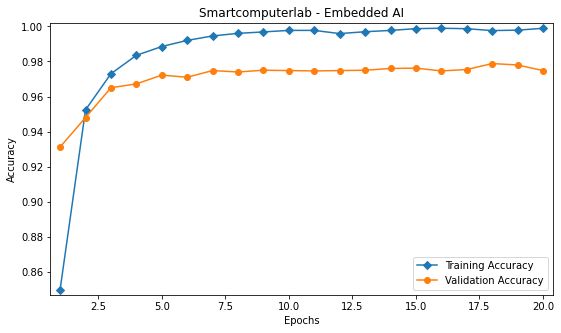

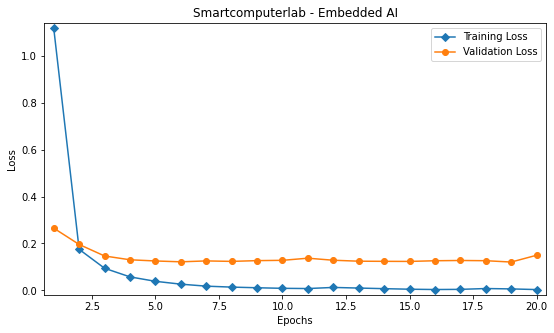

In [ ]:
# plot training loss
loss_plot(history)


**Figure 3.4a** Accuracy for convolution
model and **lr=0.0001** learning rate

**Figure 3.4b** Loss for convolution model
and **lr=0.0001** learning rate



**2.3.5 Pooling**

**Max pooling** can be defined as the process of summarizing a** group of values** with the **maximum value** within
that group. 

Similarly, if you computed the average, it would be **average pooling**. 

Pooling operations are usually
performed on the generated feature maps after convolution to reduce the number of parameters.
Let's take the example array we considered for convolution:


In [ ]:
import numpy as np
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])


Now, if you were to perform** max pooling** on this array with the pool size set to size 1 * 2 and a stride of 2, the result would be an array of [1,1,1,1,1]. The array of size 1 * 10 has been reduced to a size of 1 * 5 due to max pooling.

Here, since the pool size is of shape 1*2, you would take the subset of the target array from index 0 to index 2,
which will be [0,1], and compute the maximum of this subset as 1. 

You would do the same for the subset from
index 2 to index 4, from index 4 to index 6, index 6 to index 8, and finally index 8 to 10.


Similarly, **average pooling** can be implemented by computing the average value of the pooled section. In this
case, it would result in the array [0.5,0.5,0.5,0.5,0.5].
The following are a couple of code snippets that are implementing max and average pooling:

In [ ]:
# 1D Max Pooling
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
  result[i] = np.max(array[2*i:2*i+2])

print(result)

# 1D Mean Pooling
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
  result[i] = np.mean(array[2*i:2*i+2])
  
print(result)


[1. 1. 1. 1. 1.]
[0.5 0.5 0.5 0.5 0.5]


Consider the following code for a digit:


In [ ]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')


This image is of shape 28 * 28 . Now, if you were to perform a 2 * 2 max pooling operation of this, the resulting
image would have a shape of 14 * 14 .

Now, let's write a function to implement a 2 * 2 max pooling operation on a **MNIST** digit:


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


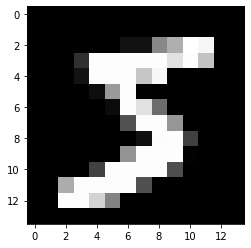

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

input_shape = (28,28,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def square_max_pool(image, pool_size=2):
  result = np.zeros((14,14))
  for i in range(result.shape[0]):
    for j in range(result.shape[1]):
      result[i,j] = np.max(image[i*pool_size:i*pool_size+pool_size,j*pool_size:j*pool_size+pool_size])
  return result

# plot a pooled image
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='gray')
plt.show()


**Figure 4** Random MNIST digit after max pooling

You may have noticed that the convolution classifier that we built in the previous section has around **2.7 million parameters**. 

It has been proven that having **a lot of parameters can lead to overfitting** in a lot of cases. This is
where pooling comes in. It helps us to retain the important features in the data as well as reduce the number of
parameters.
Now, let's implement a convolution classifier with max pooling.


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________

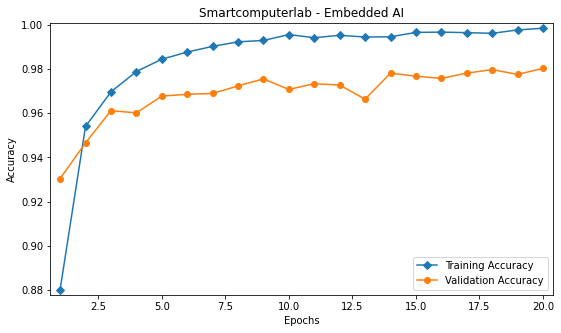

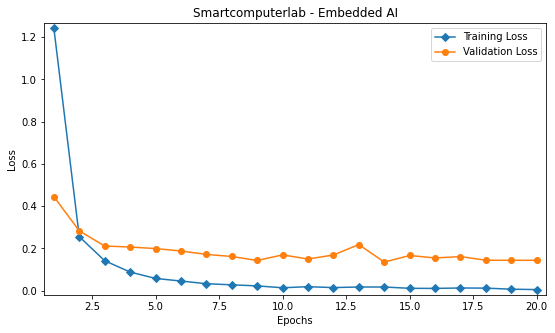

In [1]:
import numpy as np
from keras.layers import Conv2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def loss_plot(history):
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_acc,marker='D',label='Training Accuracy')
  plt.plot(np.arange(1,len(train_acc)+1),val_acc,marker='o',label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_loss,marker='D',label='Training Loss')
  plt.plot(np.arange(1,len(train_acc)+1),val_loss,marker='o',label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()

# Shape of the input image
input_shape = (28,28,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=0.08333,random_state=42)

# reshape data
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)
model = Sequential()
optimizer = Adam(lr=0.0001)
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
# print model summary
model.summary()
# Number of epochs
epochs = 20
# Batchsize
batch_size = 128
history = model.fit(X_train, y_train,
epochs=epochs,batch_size=batch_size,validation_data=(X_val, y_val))

loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)
loss_plot(history)



**2.3.7 Dropout**

A single model can be used to simulate having a large number of different network architectures by randomly
**dropping out nodes** during training. This is called dropout and offers a very computationally cheap and
remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural
networks of all kinds.


**2.3.7.1 Problem with Overfitting**

Large neural nets trained on relatively small datasets can overfit the training data.
This has the effect of the model learning the statistical noise in the training data, which results in poor
performance when the model is evaluated on new data, e.g. a test dataset. 

**Generalization error** increases due
to overfitting.
One approach to reduce overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. 

This is not feasible in practice, and can be approximated using a
small collection of different models, called an ensemble.

A problem even with the ensemble approximation is that it requires multiple models to be fit and stored, which
can be a challenge if the models are large, requiring days or weeks to train and tune.

**2.3.7.2 Randomly droping nodes**

Dropout is a regularization method that approximates training a large number of neural networks with different
architectures in parallel.
During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of
making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the
prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured
layer.

By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections
Dropout has the effect of **making the training process noisy**, forcing nodes within a layer to probabilistically take
on more or less responsibility for the inputs.

This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to
correct mistakes from prior layers, in turn making the model more robust.


**2.3.7.3 How to dropout**

Dropout is implemented per-layer in a neural network.
It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and
recurrent layers such as the long short-term memory network layer.

Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is
not used on the output layer.

A new **hyperparameter** is introduced that specifies the **probability** at which outputs of the layer are dropped out,
or inversely, the probability at which outputs of the layer are retained. The interpretation is an implementation
detail that can differ from paper to code library.

A common value is a probability of **0.5** for retaining the output of each node in a hidden layer and a value close
to 1.0, such as 0.8, for retaining inputs from the visible layer.


**2.3.7.4 Complete implementation with Dropout**


In [5]:
import numpy as np
from keras.layers import Conv2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def loss_plot(history):
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_acc,marker='D',label='Training Accuracy')
  plt.plot(np.arange(1,len(train_acc)+1),val_acc,marker='o',label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.figure(figsize=(9,5))
  plt.plot(np.arange(1,len(train_acc)+1),train_loss,marker='D',label='Training Loss')
  plt.plot(np.arange(1,len(train_acc)+1),val_loss,marker='o',label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Smartcomputerlab - Embedded AI')
  plt.legend()
  plt.margins(0.02)
  plt.show()

# Shape of the input image
input_shape = (28,28,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val =train_test_split(X_train,y_train,stratify=y_train,test_size=0.08333,random_state=42)
# reshape data
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)
model = Sequential()
optimizer = Adam(lr=0.0001)
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation=
'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
# compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
metrics = ['accuracy'])
# print model summary
model.summary()



Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_____________

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 72us/step - loss: 2.6686 - accuracy: 0.6896 - val_loss: 0.5313 - val_accuracy: 0.8612
Epoch 2/20
55000/55000 [==============================] - 4s 67us/step - loss: 0.6812 - accuracy: 0.8248 - val_loss: 0.3346 - val_accuracy: 0.9120
Epoch 3/20
55000/55000 [==============================] - 4s 66us/step - loss: 0.4846 - accuracy: 0.8760 - val_loss: 0.2442 - val_accuracy: 0.9350
Epoch 4/20
55000/55000 [==============================] - 4s 66us/step - loss: 0.3675 - accuracy: 0.9027 - val_loss: 0.2021 - val_accuracy: 0.9484
Epoch 5/20
55000/55000 [==============================] - 4s 66us/step - loss: 0.2940 - accuracy: 0.9231 - val_loss: 0.1707 - val_accuracy: 0.9532
Epoch 6/20
55000/55000 [==============================] - 4s 66us/step - loss: 0.2431 - accuracy: 0.9343 - val_loss: 0.1384 - val_accuracy: 0.9636
Epoch 7/20
55000/55000 [==============================] - 4s 66us/ste

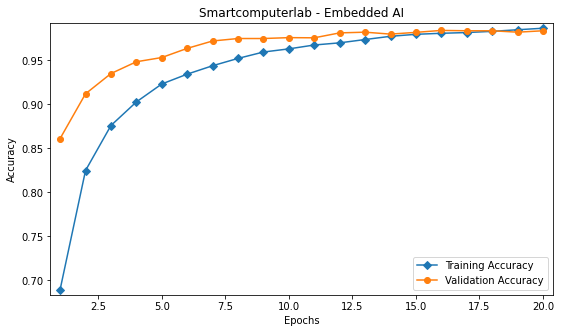

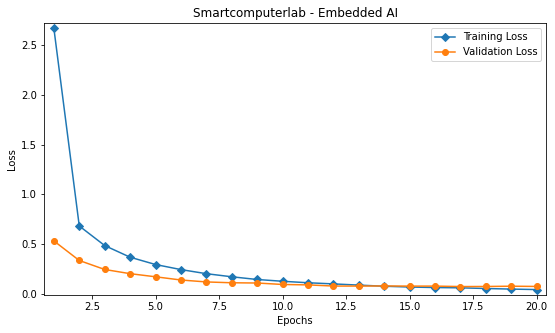

In [6]:
# Number of epochs
epochs = 20
# Batchsize
batch_size = 128
history = model.fit(X_train, y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val, y_val))
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)
loss_plot(history)

